**Basic Neural Network(ANN) Binary Classification using pytorch**

1) How to load data
2) How to define a neural network in PyTorch
3) How to train a model on data
4) How to evaluate a model
4) How to make predictions with the model

In [130]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

In [131]:
data_df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", names=['Pregnancies',
'Glucose',
'BloodPressure',
'SkinThickness',
'Insulin',
'BMI',
'Diabetes Predigree Function',
'Age',
'Outcome'])

In [132]:
data_df.shape

(768, 9)

In [133]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Predigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [134]:
X = data_df.loc[:, data_df.columns!='Outcome']
y = data_df['Outcome']

In [135]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Predigree Function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [136]:
#This will show all the no mission value boolen false No mission values
data_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes Predigree Function,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [137]:
#This will give all the colum has mission values count sume all null values
data_df.isnull().sum()

Pregnancies                    0
Glucose                        0
BloodPressure                  0
SkinThickness                  0
Insulin                        0
BMI                            0
Diabetes Predigree Function    0
Age                            0
Outcome                        0
dtype: int64

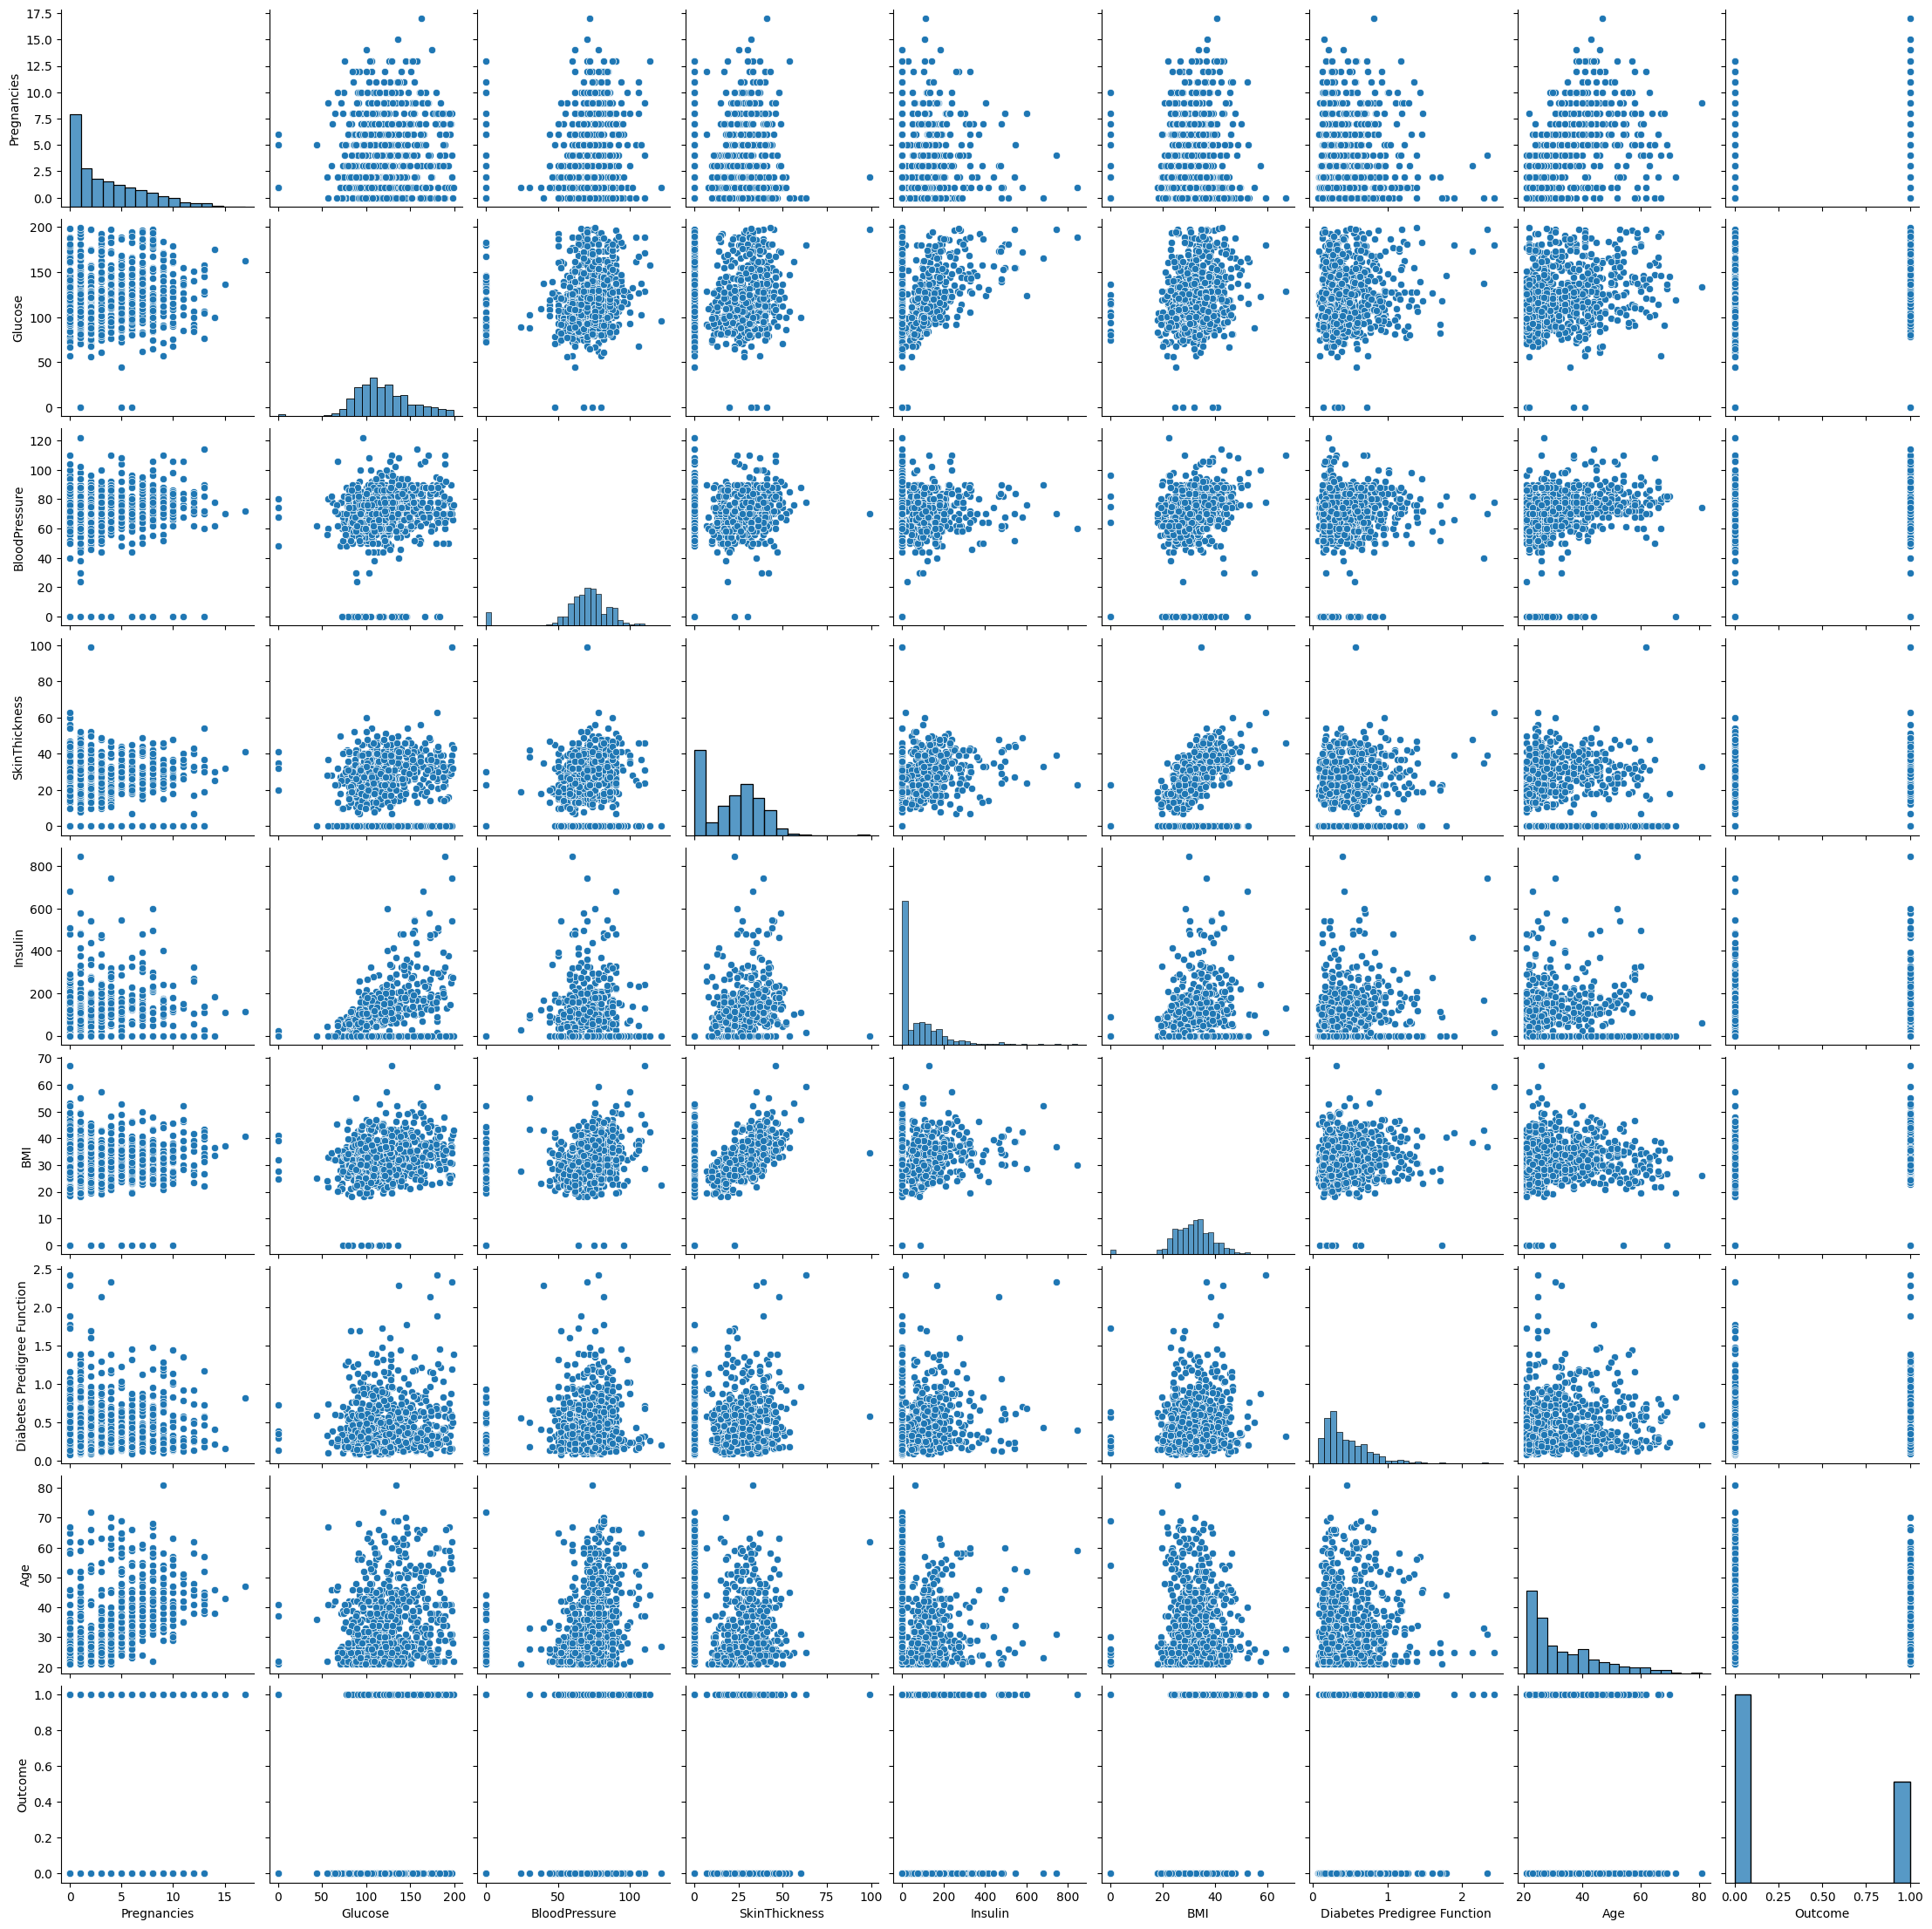

In [138]:
sns.pairplot(data_df);

In [139]:
X=X.to_numpy()

In [140]:
y=y.to_numpy()

In [141]:
X.shape, y.shape

((768, 8), (768,))

In [142]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [143]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [144]:
#Tthis Data tranform doing form model Deployment converted to PyTorch tensors first
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [145]:
X

tensor([[  6.0000, 148.0000,  72.0000,  ...,  33.6000,   0.6270,  50.0000],
        [  1.0000,  85.0000,  66.0000,  ...,  26.6000,   0.3510,  31.0000],
        [  8.0000, 183.0000,  64.0000,  ...,  23.3000,   0.6720,  32.0000],
        ...,
        [  5.0000, 121.0000,  72.0000,  ...,  26.2000,   0.2450,  30.0000],
        [  1.0000, 126.0000,  60.0000,  ...,  30.1000,   0.3490,  47.0000],
        [  1.0000,  93.0000,  70.0000,  ...,  30.4000,   0.3150,  23.0000]])

In [146]:
y

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
      

In [147]:
X.shape

torch.Size([768, 8])

In [148]:
y.shape

torch.Size([768, 1])

In [149]:
model=nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

In [150]:
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [151]:
#Anothere ways to define class Inherited model
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x
    
model = PimaClassifier()
print(model)

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [152]:
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [153]:
#this will help the nn attrribue
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout1d',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'HuberLoss',
 'Identity',
 'InstanceNorm1d

In [154]:
#Now we are going to train the model to feeded to to model
n_epochs = 100
batch_size = 10
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.6468382477760315
Finished epoch 1, latest loss 0.5418844223022461
Finished epoch 2, latest loss 0.5380864143371582
Finished epoch 3, latest loss 0.5267348289489746
Finished epoch 4, latest loss 0.5261744260787964
Finished epoch 5, latest loss 0.5208724737167358
Finished epoch 6, latest loss 0.5064527988433838
Finished epoch 7, latest loss 0.5053642988204956
Finished epoch 8, latest loss 0.49150773882865906
Finished epoch 9, latest loss 0.4883314073085785
Finished epoch 10, latest loss 0.482371985912323
Finished epoch 11, latest loss 0.4809221029281616
Finished epoch 12, latest loss 0.47604212164878845
Finished epoch 13, latest loss 0.47068101167678833
Finished epoch 14, latest loss 0.4685841202735901
Finished epoch 15, latest loss 0.45879799127578735
Finished epoch 16, latest loss 0.4586929380893707
Finished epoch 17, latest loss 0.45706015825271606
Finished epoch 18, latest loss 0.4551175534725189
Finished epoch 19, latest loss 0.4523768723011017
Finish

In [155]:
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X)
    
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.7708333134651184


In [164]:
# make probability predictions with the model
predictions = model(X)
# round predictions
rounded = predictions.round()


# make class predictions with the model
predictions = (model(X) > 0.5).int()

In [162]:
# make class predictions with the model
predictions = (model(X) > 0.5).int()
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 1 (expected 1)


In [181]:
import torch
import torch.nn as nn
import torch.optim as optim
# load the dataset, split into input (X) and output (y) variables
dataset = pd.read_csv('diabetes.csv', delimiter=",").values
X = dataset[:,0:8]
y = dataset[:,8]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# define the model
model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)
print(model)

# train the model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("---------Model Traingin-------")
n_epochs = 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

print("---------Accuracy Model--------")    
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X)
    
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")


print("---------Prediction--------------")
# make class predictions with the model
predictions = (model(X) > 0.5).int()
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)
---------Model Traingin-------
Finished epoch 0, latest loss 0.679728090763092
Finished epoch 1, latest loss 0.6130332946777344
Finished epoch 2, latest loss 0.5950340032577515
Finished epoch 3, latest loss 0.5830500721931458
Finished epoch 4, latest loss 0.5704081654548645
Finished epoch 5, latest loss 0.5557066202163696
Finished epoch 6, latest loss 0.5441159009933472
Finished epoch 7, latest loss 0.5285614728927612
Finished epoch 8, latest loss 0.5172419548034668
Finished epoch 9, latest loss 0.5056546926498413
Finished epoch 10, latest loss 0.4957978427410126
Finished epoch 11, latest loss 0.4882376790046692
Finished epoch 12, latest loss 0.4841177463531494
Finished epoch 13, latest loss 0.47837525606155396
Finished epoch 14, latest loss 0.46849822998046875